<a href="https://colab.research.google.com/github/ekanshi258/optimization-algos/blob/master/structural_design_3_nsga2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymoo

This experiment is based on the following paper:  
_Solving structural engineering design optimization problems using an artificial bee colony algorithm_: https://www.aimsciences.org/article/doi/10.3934/jimo.2014.10.777

I will be using the NSGA2 to solve the same problem as given in the paper.


In [2]:
import numpy as np
from pymoo.model.problem import FunctionalProblem

The paper states 3 structural design problems. 

Problem 3:  
**Tension/Compression String Design. (Section 4.2.3).**


---


Objective functions:  
```
Minimize f(X) = (x3 + 2) * x2 * x1^2
Such that:
g1(X) = 1 − (x2^3 * x3)/(71785 * x1^4) <= 0
g2(X) = (4*x2^2 − x1*x2)/12566*(x2*x1^3 − x1^4) + 1/(5108 * x1^2) − 1 <= 0
g3(X) = 1 − (140.45 * x1)/(x2^2 * x3) <= 0
g4(X) = (x1 + x2)/(1.5) − 1 <= 0

Bounds:
0.05 <= x1 <= 2 ; 0.25 <= x2 <= 1.3 ; 2 <= x3 <= 15
```

> Minimizing the weight of a tension/compression spring subject to constraints on minimum deflection, shear stress, surge frequency, limits on outside diameter and on design
variables. The design variables are the mean coil diameter(x1), the wire diameter (x2) and the number of active coil (x3).
 



In [3]:
#objective functions
objs = [
    lambda x: (x[2] + 2) * x[1] * x[0]**2,
]

# Contraint equations
constr_ieq = [
    lambda x: 1 - (x[1]**3 * x[2])/(71785 * x[0]**4),
    lambda x: (4*x[1]**2 - x[0]*x[1])/(12566*(x[1] * x[0]**3 - x[0]**4)) + 1/(5108 * x[0]**2) - 1,
    lambda x: 1 - (140.45 * x[0])/(x[1]**2 * x[2]),
    lambda x: (x[0] + x[1])/(1.5) - 1
]

# value bounds
lower_bound = np.array([0.05, 0.25, 2])
upper_bound = np.array([2, 1.3, 15])

# initialising problem
problem = FunctionalProblem(3, objs, constr_ieq=constr_ieq, xl=lower_bound, xu=upper_bound)

Initialising NSGA2 and setting a termination condition:

In [4]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination

algorithm = NSGA2(
    pop_size=100,
    n_offsprings=25,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

termination = get_termination("n_gen", 280)

Putting it all to work:

In [ ]:
from pymoo.optimize import minimize

ans = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

(output has been hidden due to its length)

In [6]:
print("X: ", ans.X)
print("Obj: ", ans.F)
print("Constraints: ", ans.G)

X:  [0.05698529 0.49784682 6.15037622]
Obj:  [0.01317647]
Constraints:  [0. 0. 0. 0.]


The value of the objective function using the Aritifical Bee Colony was `f(X) = 0.01266`, which is not too far off from our result. However some observations can be made.

**Observations**

1. Some normalization may be required, since the ranges of each of the parameters are very different in size and magnitude.
2. Parameter tuning for the NSGA2 algo itself may be required, but might turn out to be computationally intensive

Covergence:



```
x-axis: number of function evaluations
y-axis: optimum objective value
```


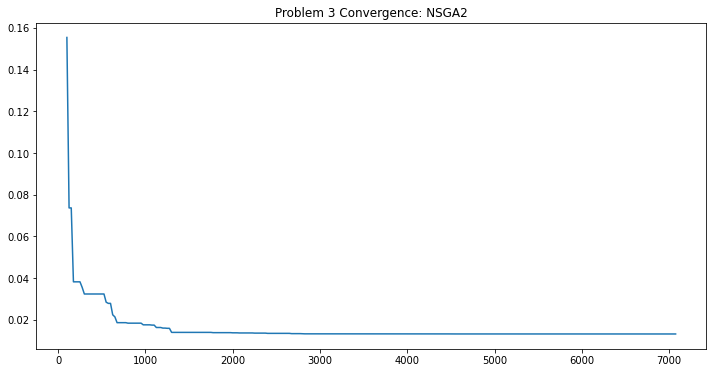

In [9]:
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in ans.history])
opt = np.array([e.opt[0].F for e in ans.history])
plt.figure(figsize=(12,6))
plt.title("Problem 3 Convergence: NSGA2")
plt.plot(n_evals, opt, "-")
plt.show()

Convergence with Log y-axis:

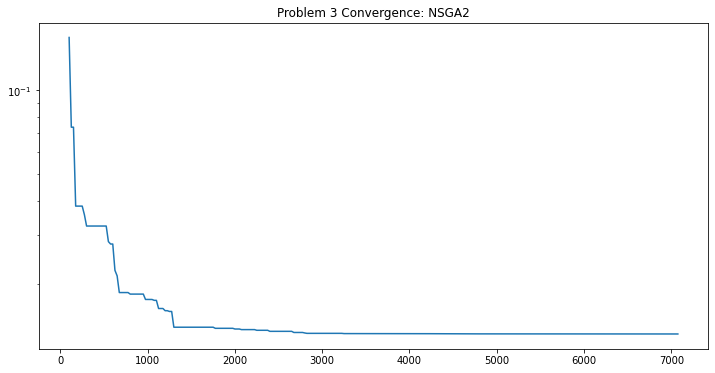

In [10]:
n_evals = np.array([e.evaluator.n_eval for e in ans.history])
opt = np.array([e.opt[0].F for e in ans.history])
plt.figure(figsize=(12,6))
plt.title("Problem 3 Convergence: NSGA2")
plt.plot(n_evals, opt, "-")
plt.yscale("log")
plt.show()